# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [2]:
import pandas as pd

today = pd.Timestamp.today()

In [3]:
pd.set_option('display.max_rows', None)

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [4]:
df = pd.read_excel(
    "NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx"
    )
df.head()

Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1                NaN   2013-04-01             No               No        Yes   
2                NaN   2014-09-01            Yes              NaN         No   
3                NaN   2008-04-01            Yes               No        Yes   
4                NaN   2014-01-01             No              NaN         No   

         Application Date License Issued Date License Expired Date  
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  
1 2013-09-20 11:41:36.647          2014-09-20           2018-09-20  
2 2014-09-12 13:13:36.713          2014-09-12           2019-09-12  
3 2014-09-12 15:26:51.417          2014-09-12           2017-10-20  
4 2014-09-12 15:43:17.707          2014-09-12           2019-09-12

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81937 entries, 0 to 81936
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          81937 non-null  int64         
 1   Animal Name             81738 non-null  object        
 2   Animal Gender           81937 non-null  object        
 3   Primary Breed           81937 non-null  object        
 4   Secondary Breed         10547 non-null  object        
 5   Animal Dominant Color   81608 non-null  object        
 6   Animal Secondary Color  56919 non-null  object        
 7   Animal Third Color      17641 non-null  object        
 8   Animal Birth            81937 non-null  datetime64[ns]
 9   Spayed or Neut          81937 non-null  object        
 10  Guard or Trained        49576 non-null  object        
 11  Vaccinated              81937 non-null  object        
 12  Application Date        81937 non-null  dateti

In [6]:
df.shape

(81937, 15)

In [7]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [8]:
# Each row is representative of a single registered dog tag for a pet in NYC.
# Owner zip code indicates the geographical location of where the owner and likely pet lives.
# Spayed or Neut indicates if the pet has had either been spayed or neutred which are common medical procedures for pets.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [9]:
# If I had a data disctionary, I would be curious what guard or trained means and why those descriptiors are paired together
# Why do some pets have a secondary breed but no primary breed?
# What vaccination(s) does the "Vaccinated" column represent?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

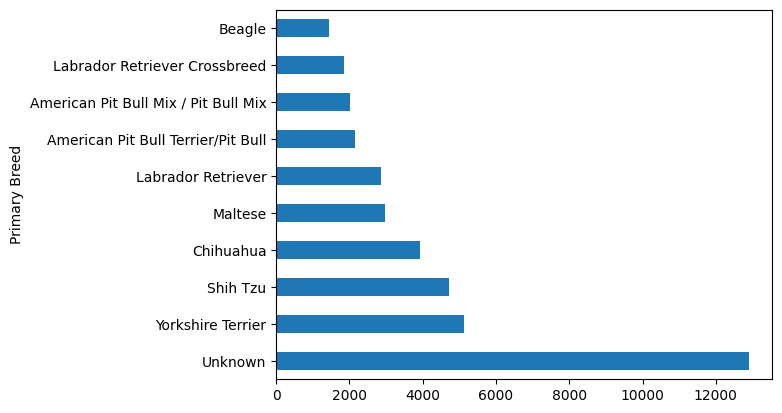

In [10]:
df['Primary Breed'].value_counts(ascending=False).head(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: ylabel='Primary Breed'>

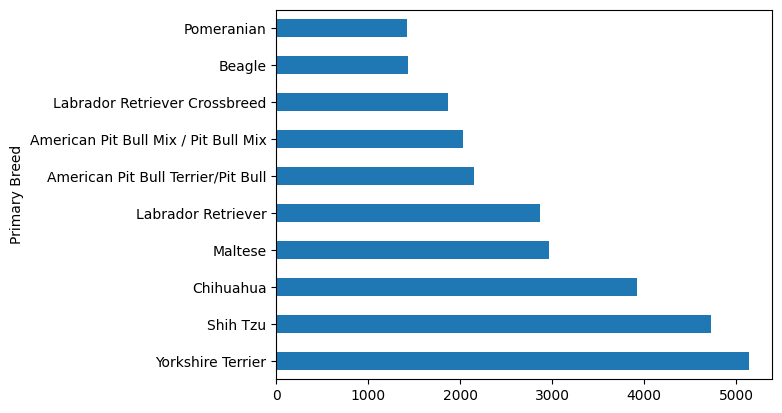

In [11]:
df['Primary Breed'].value_counts(ascending=False).drop('Unknown', errors='ignore').head(10).plot(kind='barh')

## What are the most popular dog names?

In [12]:
df['Animal Name'].value_counts().drop(
    ['UNKNOWN', 'Unknown', 'unknown'], 
    errors='ignore'
)

# The most popular dog names are Bella, Max, Charlie, Lola 

Animal Name
Bella                                                         527
Max                                                           515
Charlie                                                       403
Lola                                                          387
Rocky                                                         354
Lucy                                                          338
Coco                                                          308
Buddy                                                         300
Lucky                                                         291
Daisy                                                         279
Bailey                                                        259
Dog Name Not Provided                                         243
no name                                                       240
Molly                                                         229
Toby                                                          22

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [13]:
df[df['Animal Name'].str.contains("Kylie", na=False)]
# Yes, 14 pets are named Kylie which is my name
# One Shih Tzu named "Kylie Ginger" has my name followed by my mother's name.

Owner Zip Code          Animal Name Animal Gender  \
6871            10023         Kylie Ginger             F   
16790           11221                Kylie             F   
19039           11358            Kylie Joy             F   
24527           10033                Kylie             F   
41378           11231         Kylie Bandit             F   
47901           10021                Kylie             F   
52150           11105            Kylie Rue             F   
55331           11220                Kylie             F   
58496           11432                Kylie             F   
60977           10009                Kylie             F   
64323           10003                Kylie             F   
71482           11422  Kylie Louts Miller              F   
74695           10023                Kylie             F   
78200           11361                Kylie             F   

                    Primary Breed        Secondary Breed  \
6871                     Shih Tzu                    NaN   
16790                   Chihuahua                    NaN   
19039     West High White Terrier                    NaN   
24527                   Greyhound                    NaN   
41378              Siberian Husky                    NaN   
47901                 Labradoodle                    NaN   
52150                      Morkie                    NaN   
55331                  Pomeranian                    NaN   
58496                     Unknown  Havenese/Shih-Tzu Mix   
60977          Labrador Retriever                    NaN   
64323  German Shepherd Crossbreed                    NaN   
71482           Yorkshire Terrier                    NaN   
74695                 Labradoodle                    NaN   
78200                     Unknown      Dachshund-Scottie   

      Animal Dominant Color Animal Secondary Color Animal Third Color  \
6871                  WHITE                 ORANGE                NaN   
16790                 BLOND                  WHITE                TAN   
19039                 WHITE                    TAN                NaN   
24527                  Fawn                    NaN                NaN   
41378                  GRAY                  BLACK              WHITE   
47901               Apricot                    NaN                NaN   
52150                 Black                  White                NaN   
55331                 White                Apricot                NaN   
58496                 BLACK                  WHITE                NaN   
60977                 BLACK                  BROWN                NaN   
64323                 White                  Black             Silver   
71482                  GRAY                  BLACK                TAN   
74695                 CREAM                    NaN                NaN   
78200                 BLACK                BRINDLE                NaN   

      Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
6871    2012-12-01            Yes               No        Yes   
16790   2008-05-01            Yes               No        Yes   
19039   2009-08-01            Yes               No        Yes   
24527   2010-01-01            Yes              NaN        Yes   
41378   2009-04-01            Yes               No        Yes   
47901   2007-01-01            Yes              NaN         No   
52150   2015-09-01             No              NaN         No   
55331   2014-11-01            Yes              NaN        Yes   
58496   2009-06-01            Yes               No        Yes   
60977   2010-09-01            Yes               No        Yes   
64323   2010-03-01            Yes              NaN        Yes   
71482   2013-06-01            Yes               No        Yes   
74695   2002-11-01            Yes               No        Yes   
78200   2008-06-01            Yes               No        Yes   

             Application Date License Issued Date License Expired Date  
6871  2015-05-12 09:59:06.227          2015-05-12           

In [14]:
df['Animal Name'].str.contains("Max", na=False).value_counts()
# 515 dogs are named Max


Animal Name
False    81010
True       927
Name: count, dtype: int64

In [15]:
df['Animal Name'].str.contains("Maxwell", na=False).value_counts().drop(
    ['UNKNOWN', 'Unknown', 'unknown'], 
    errors='ignore'
)
# There are 51 dogs named Maxwell

Animal Name
False    81886
True        51
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [16]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.998971
Yes    0.001029
Name: proportion, dtype: float64

## What are the actual numbers?

In [17]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     49525
Yes       51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [18]:
# The total number of rows is 81937, which means almost half the dataset is not included in this column
df['Guard or Trained'].isnull()

# Many of them are NaN

0        False
1        False
2         True
3        False
4         True
5         True
6         True
7        False
8        False
9        False
10       False
11        True
12        True
13       False
14        True
15        True
16       False
17       False
18        True
19        True
20        True
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34        True
35       False
36       False
37        True
38       False
39        True
40        True
41       False
42        True
43       False
44        True
45       False
46       False
47       False
48        True
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64        True
65       False
66       F

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [19]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

In [20]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     81886
Yes       51
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [21]:
df[df['Guard or Trained'] == 'Yes'].groupby('Primary Breed')['Guard or Trained'].value_counts()
# The top dog breeds for guard dogs are American Pit Bull Mix, German Shepard Dog, Rottweiler and Chihuahua


Primary Breed                         Guard or Trained
American Pit Bull Mix / Pit Bull Mix  Yes                  3
Beagle Crossbreed                     Yes                  1
Border Terrier                        Yes                  1
Boxer                                 Yes                  1
Chihuahua                             Yes                  3
Dachshund, Long Haired                Yes                  1
Doberman Pinscher                     Yes                  1
German Shepherd Crossbreed            Yes                  1
German Shepherd Dog                   Yes                  4
Golden Retriever                      Yes                  1
Jack Russell Terrier                  Yes                  1
Labrador Retriever                    Yes                  3
Maltese                               Yes                  1
Miniature Pinscher                    Yes                  1
Pekingese                             Yes                  1
Poodle, Miniature             

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [22]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1                NaN   2013-04-01             No               No        Yes   
2                NaN   2014-09-01            Yes               No         No   
3                NaN   2008-04-01            Yes               No        Yes   
4                NaN   2014-01-01             No               No         No   

         Application Date License Issued Date License Expired Date  Year  
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  2007  
1 2013-09-20 11:41:36.647          2014-09-20           2018-09-20  2013  
2 2014-09-12 13:13:36.713          2014-09-12           2019-09-12  2014  
3 2014-09-12 15:26:51.417          2014-09-12           2017-10-20  2008  
4 2014-09-12 15:43:17.707          2014-09-12           2019-09-12  2014

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [23]:
df['Age'] = (today - df['Animal Birth']).dt.days / 365

In [24]:
df.head()

Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1                NaN   2013-04-01             No               No        Yes   
2                NaN   2014-09-01            Yes               No         No   
3                NaN   2008-04-01            Yes               No        Yes   
4                NaN   2014-01-01             No               No         No   

         Application Date License Issued Date License Expired Date  Year  \
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  2007   
1 2013-09-20 11:41:36.647          2014-09-20           2018-09-20  2013   
2 2014-09-12 13:13:36.713          2014-09-12           2019-09-12  2014   
3 2014-09-12 15:26:51.417          2014-09-12           2017-10-20  2008   
4 2014-09-12 15:43:17.707          2014-09-12           2019-09-12  2014   

         Age  
0  18.063014  
1  12.643836  
2  11.224658  
3  17.646575  
4  11.890411

In [25]:
df['Age'].mean()
# The dogs are 16 years old on average

np.float64(15.860619911622711)

# Joining data together

In [26]:
zc = pd.read_csv("zipcodes-neighborhoods.csv")
zc.head()

neighborhood    zip borough
0           Central Bronx  10453   Bronx
1           Central Bronx  10457   Bronx
2           Central Bronx  10460   Bronx
3  Bronx Park and Fordham  10458   Bronx
4  Bronx Park and Fordham  10467   Bronx

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [27]:
merged = zc.merge(df, left_on='zip', right_on='Owner Zip Code')

In [28]:
merged.head()

neighborhood    zip borough  Owner Zip Code Animal Name Animal Gender  \
0  Central Bronx  10453   Bronx           10453      T-Bone             M   
1  Central Bronx  10453   Bronx           10453        Cici             F   
2  Central Bronx  10453   Bronx           10453        Blue             M   
3  Central Bronx  10453   Bronx           10453         Boi             M   
4  Central Bronx  10453   Bronx           10453  MARSHMELLO             F   

                          Primary Breed Secondary Breed Animal Dominant Color  \
0                               Bulldog             NaN                 White   
1  American Pit Bull Mix / Pit Bull Mix             NaN                 BROWN   
2                          Basset Hound             NaN                 Brown   
3                     Yorkshire Terrier             NaN                 Black   
4                               Samoyed             NaN                 WHITE   

  Animal Secondary Color Animal Third Color Animal Birth Spayed or Neut  \
0                    Tan            Apricot   2010-04-01            Yes   
1                   RUST              BLACK   2008-11-01            Yes   
2                    Tan              Cream   2005-02-01            Yes   
3                   Gray                Tan   2011-02-01            Yes   
4                    NaN                NaN   2004-01-01            Yes   

  Guard or Trained Vaccinated        Application Date License Issued Date  \
0               No        Yes 2014-11-16 16:48:08.080          2014-11-16   
1               No         No 2015-02-06 10:35:12.917          2015-02-06   
2               No         No 2015-02-10 16:43:24.847          2015-02-10   
3               No        Yes 2015-02-10 16:43:24.847          2015-02-10   
4               No        Yes 2015-03-27 14:47:53.483          2015-03-27   

  License Expired Date  Year        Age  
0           2016-11-16  2010  15.646575  
1           2017-04-28  2008  17.060274  
2           2017-02-10  2005  20.810959  
3           2017-02-10  2011  14.808219  
4           2017-03-30  2004  21.898630

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [29]:
merged[merged['borough'] == 'Bronx'].groupby('Animal Name').size().sort_values(ascending=False)

# The most popular name in the Bronx is Rocky


Animal Name
Rocky                                                         60
Max                                                           56
Bella                                                         54
Lucky                                                         51
Princess                                                      43
Coco                                                          38
Lola                                                          33
Buddy                                                         28
Charlie                                                       28
Gizmo                                                         27
Oreo                                                          26
Prince                                                        25
Luna                                                          24
Mia                                                           24
Unknown                                                       23
Daisy        

In [30]:
merged.loc[merged['borough'] == 'Brooklyn', 'Animal Name'] \
      .value_counts()
# The most common name in Brooklyn is Max.

Animal Name
unknown                                   234
Unknown                                   161
UNKNOWN                                   155
Max                                       113
Bella                                     112
Charlie                                    96
Lola                                       88
Dog Name Not Provided                      84
Rocky                                      80
Lucy                                       80
no name                                    74
No Name                                    69
Lucky                                      68
Buddy                                      65
Daisy                                      62
Chloe                                      61
Princess                                   60
Coco                                       58
Penny                                      57
Luna                                       56
Teddy                                      53
Bailey                

In [31]:
merged[merged['neighborhood'] == 'Upper East Side'].groupby('Animal Name').size().sort_values(ascending=False)

# The most popular name in the Upper East Side neighborhood is Lucy.

Animal Name
Lucy                                                 40
Bella                                                31
Charlie                                              29
Coco                                                 29
NO NAME                                              26
Lola                                                 25
Dog Name Not Provided                                22
Bailey                                               21
Molly                                                20
UNKNOWN                                              20
Oliver                                               19
Buddy                                                19
Daisy                                                18
Penny                                                18
Chloe                                                18
Sammy                                                17
Luna                                                 16
Max                                 

## What is the most common dog breed in each of the neighborhoods of NYC?

In [32]:
merged.groupby('neighborhood')['Primary Breed'] \
      .value_counts() \
      .groupby(level=0) \
      .head(2)

neighborhood                   Primary Breed                     
Borough Park                   Unknown                               287
                               Yorkshire Terrier                     115
Bronx Park and Fordham         Unknown                               121
                               Yorkshire Terrier                      88
Bushwick and Williamsburg      Unknown                               196
                               Yorkshire Terrier                     135
Canarsie and Flatlands         Unknown                               218
                               Yorkshire Terrier                     137
Central Bronx                  Yorkshire Terrier                      82
                               Unknown                                71
Central Brooklyn               Unknown                               268
                               Shih Tzu                              113
Central Harlem                 Unknown                    

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [39]:
colors = ['black', 'grey', 'gray', 'white', 'BLACK', 'GREY', 'GRAY','WHITE']

merged['Monochrome'] = merged['Animal Dominant Color'].str.lower().isin(colors)


In [ ]:
merged['Monochrome'].head()

/var/folders/sp/cdf0qrvs06bfnmz5yd655lp00000gn/T/ipykernel_50531/3704567661.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged[merged['Monochrome'].head()]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
merged['Monochrome'].value_counts()
# 43149 animals are monochrome

Monochrome
True     43149
False    37710
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

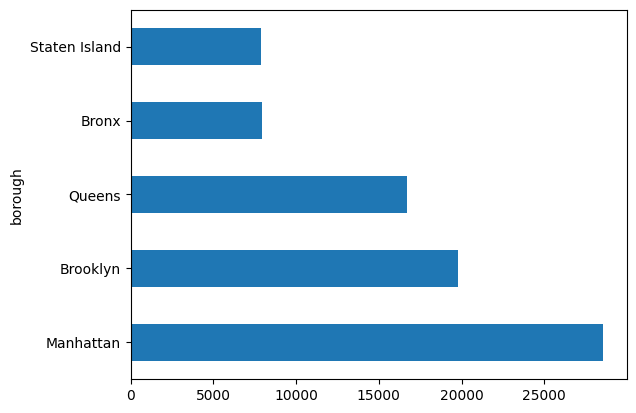

In [ ]:
merged['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [54]:
pb = pd.read_csv("boro_population.csv")

In [57]:
merged2 = pb.merge(merged, on='borough')

In [59]:
merged2.head()

borough  population  area_sqmi    neighborhood    zip  Owner Zip Code  \
0  Manhattan     1644518         23  Central Harlem  10026           10026   
1  Manhattan     1644518         23  Central Harlem  10026           10026   
2  Manhattan     1644518         23  Central Harlem  10026           10026   
3  Manhattan     1644518         23  Central Harlem  10026           10026   
4  Manhattan     1644518         23  Central Harlem  10026           10026   

   Animal Name Animal Gender      Primary Breed Secondary Breed  ...  \
0   OREO MARIN             F           Havanese             NaN  ...   
1  Jake Isbell             M             Puggle             NaN  ...   
2       OLIVIA             F           Havanese             NaN  ...   
3        Henry             M            Unknown       Hound Mix  ...   
4        Milo              M  Yorkshire Terrier             NaN  ...   

  Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0   2005-09-01            Yes               No        Yes   
1   2013-10-01            Yes               No        Yes   
2   2008-03-01            Yes               No        Yes   
3   2007-07-01            Yes               No        Yes   
4   2011-06-01            Yes               No        Yes   

         Application Date License Issued Date License Expired Date  Year  \
0 2014-09-24 11:00:58.667          2014-09-24           2017-05-21  2005   
1 2014-10-01 22:16:25.653          2014-10-01           2017-10-01  2013   
2 2014-10-11 15:08:12.983          2014-10-11           2017-08-19  2008   
3 2014-11-01 13:52:57.347          2014-11-01           2016-11-01  2007   
4 2014-11-04 21:11:14.157          2014-11-04           2016-11-04  2011   

         Age Monochrome  
0  20.230137       True  
1  12.142466      False  
2  17.731507       True  
3  18.400000       True  
4  14.479452      False  

[5 rows x 23 columns]

In [66]:
dog_counts = merged2['borough'].value_counts()


In [68]:
population = merged2.groupby('borough')['population'].first()


In [70]:
dogs_per_capita = dog_counts / population

In [ ]:
dogs_per_capita.sort_values(ascending=False)
# Manhattan has the highest dogs per capita


borough
Manhattan        0.017352
Staten Island    0.016626
Brooklyn         0.007504
Queens           0.007138
Bronx            0.005463
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

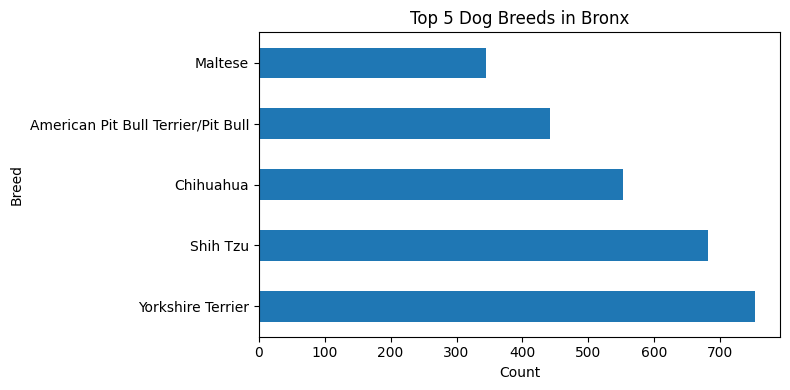

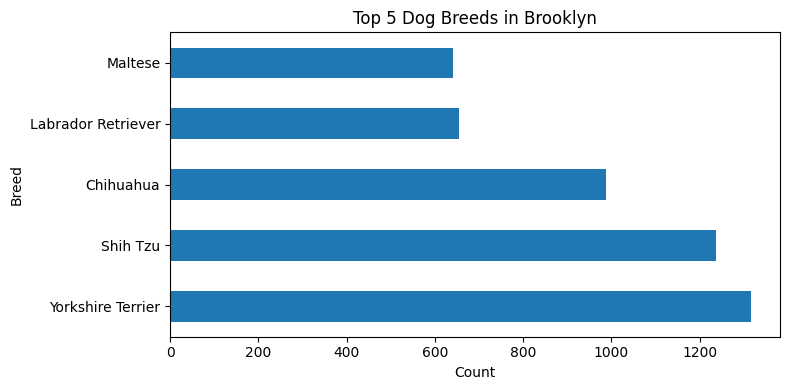

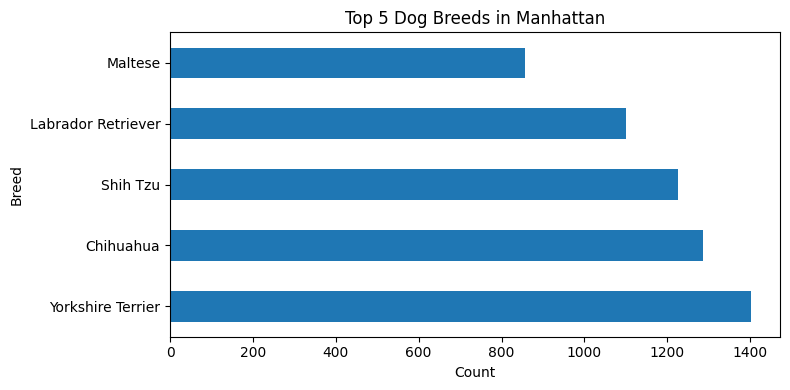

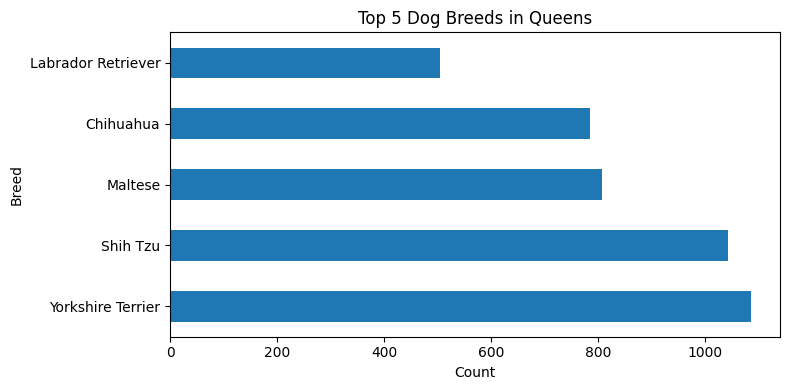

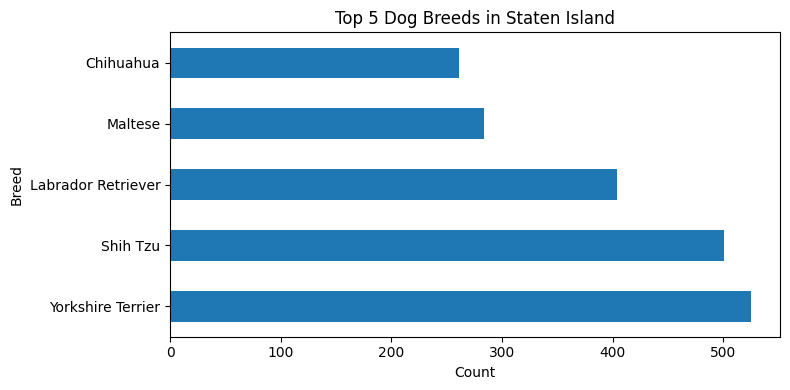

In [73]:
import matplotlib.pyplot as plt

borough_groups = merged.groupby('borough')

for borough, group in borough_groups:
    top5 = group['Primary Breed'].value_counts().head(6).drop('Unknown', errors='ignore')

    plt.figure(figsize=(8,4))
    top5.plot(kind='barh')
    plt.title(f"Top 5 Dog Breeds in {borough}")
    plt.xlabel("Count")
    plt.ylabel("Breed")
    plt.tight_layout()
    plt.show()